##### $\hspace{15pt}$ **Filename: featureImportance.ipynb**
##### $\hspace{1.5pt}$ **Date Created: December 5, 2023**
##### **Date Modified: December 19, 2023**
##### $\rule{10.5in}{1pt}$
##### **Display different types of feature importance after training predictive models on the [bank customer churn dataset](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset) from Kaggle. The feature importance scores are calculated based on one of the following: absolute value of standardized coefficients, mean decrease in Gini impurity, permutation importance, and SHAP values.**

##### **Restart the runtime after installing the packages and before running the remaining cells of the notebook.**

##### $\rule{10.5in}{1pt}$

##### Install `dython` and `shap`.

In [ ]:
!pip install dython -q shap -q

##### Update `seaborn`.

In [ ]:
!pip install -U seaborn -q

##### Restart the runtime, and load modules and packages.

In [1]:
from dython.nominal import associations
from google.colab import drive
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap
import sklearn

##### Set pandas dataframes to display all the columns.

In [2]:
pd.set_option("display.max_columns", None)

##### Set the float format of pandas dataframes.

In [3]:
pd.options.display.float_format = "{:.4f}".format

##### Mount Google Drive to Colab.

In [4]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Load the dataset from Google Drive.

In [5]:
path = "gdrive/MyDrive/Colab Notebooks/9_featureImportance/"
dataset = pd.read_csv(path + "bankCustomerChurnDataset.csv")
dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,15647311,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,15619304,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,15701354,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,15737888,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


##### Check if there are missing values.

In [6]:
dataset.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

##### Visualize the continuous features in the dataset.

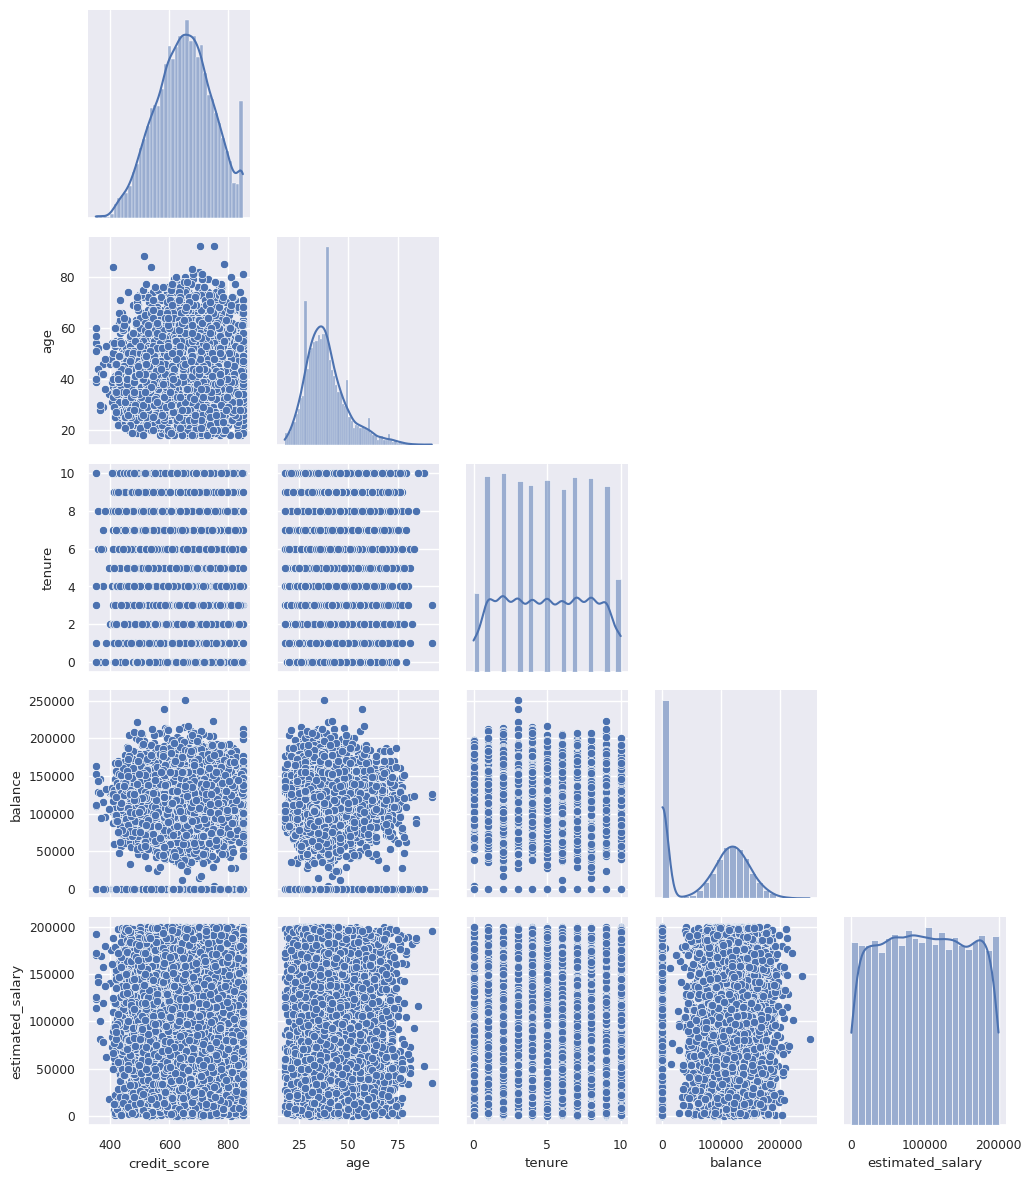

In [7]:
sns.set_style("white")
sns.set(font_scale = 0.8)
grid = sns.PairGrid(dataset, vars = ["credit_score", "age", "tenure", "balance", "estimated_salary"], corner = True,
                    diag_sharey = False)
grid.fig.set_size_inches(10, 12)
grid.map_diag(sns.histplot, stat = "percent", kde = True)
grid.map_lower(sns.scatterplot)
plt.show()

##### Visualize the categorical features in the dataset.

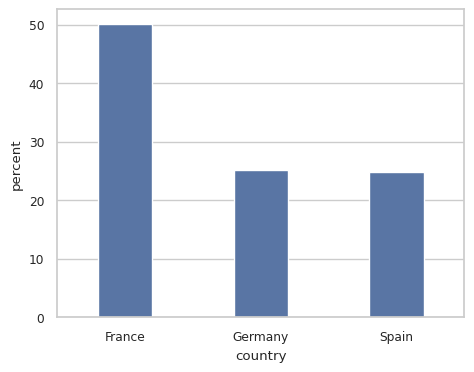

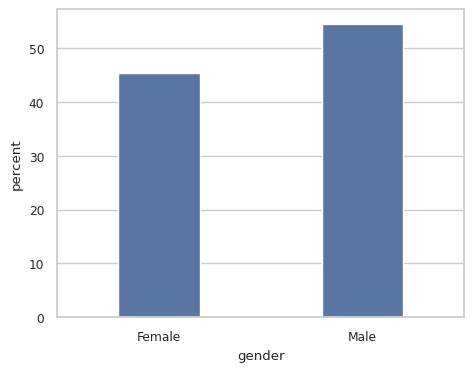

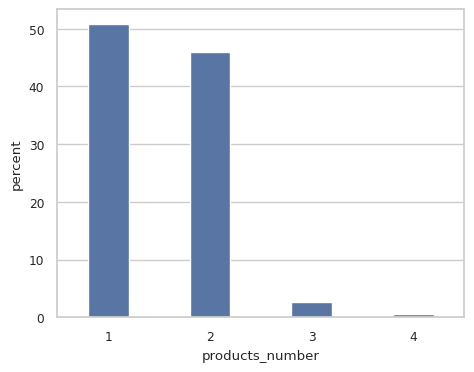

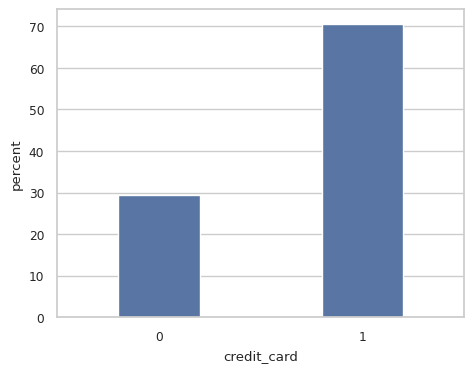

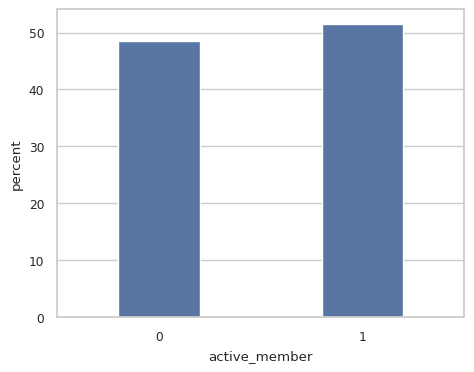

In [8]:
plt.rcParams["figure.figsize"] = [5.25, 4]
sns.set_style("whitegrid")

categoricalFeatures = ["country", "gender", "products_number", "credit_card", "active_member"]

for feature in categoricalFeatures:

    uniqueValues = dataset[feature].unique().tolist()
    uniqueValues.sort()
    sns.countplot(data = dataset, x = feature, order = uniqueValues, stat = "percent", width = 0.4)
    plt.show()

##### Visualize the target in the dataset.

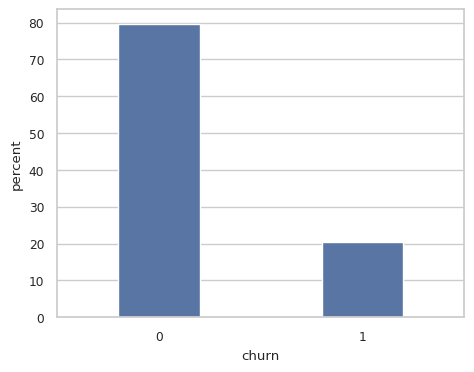

In [9]:
uniqueValues = dataset["churn"].unique().tolist()
uniqueValues.sort()
sns.countplot(data = dataset, x = "churn", order = uniqueValues, stat = "percent", width = 0.4)
plt.show()

##### Extract the input data from the dataset.

In [10]:
inputData = dataset.drop(columns = ["customer_id", "churn"])
inputData.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000


##### Extract the target data from the dataset.

In [11]:
targetData = dataset[["churn"]]
targetData.head()

,churn
0,1
1,0
2,1
3,0
4,0


##### Split the dataset into train and test sets.

In [12]:
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(inputData, targetData, test_size = 0.3, random_state = 1)

In [13]:
xTrain.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2228,644,France,Female,37,8,0.0000,2,1,0,20968.8800
5910,481,France,Female,39,6,0.0000,1,1,1,24677.5400
1950,680,France,Female,37,10,123806.2800,1,1,0,81776.8400
2119,690,France,Male,29,5,0.0000,2,1,0,108577.9700
5947,656,France,Female,45,7,145933.2700,1,1,1,199392.1400


In [14]:
yTrain.head()

,churn
2228,0
5910,0
1950,1
2119,0
5947,0


In [15]:
len(xTrain)

7000

In [16]:
xTest.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9953,550,France,Male,47,2,0.0000,2,1,1,97057.2800
3850,680,France,Male,34,3,143292.9500,1,1,0,66526.0100
4962,531,France,Female,42,2,0.0000,2,0,1,90537.4700
3886,710,Germany,Male,34,8,147833.3000,2,0,1,1561.5800
5437,543,Germany,Male,30,6,73481.0500,1,1,1,176692.6500


In [17]:
yTest.head()

,churn
9953,0
3850,0
4962,0
3886,0
5437,0


In [18]:
len(xTest)

3000

##### Visualize the target in the train set.

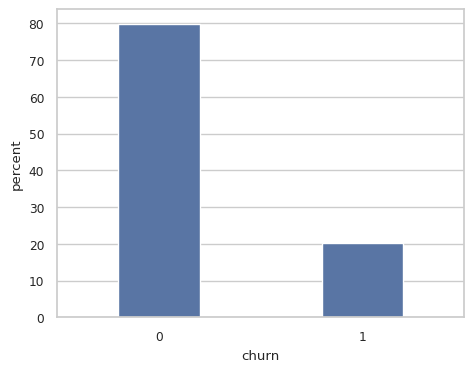

In [19]:
trainSet = pd.concat([xTrain, yTrain], axis = 1)

uniqueValues = trainSet["churn"].unique().tolist()
uniqueValues.sort()
sns.countplot(data = trainSet, x = "churn", order = uniqueValues, stat = "percent", width = 0.4)
plt.show()

##### Apply random undersampling to balance out the majority and the minority classes in the train set.

In [20]:
classZero = trainSet[trainSet["churn"] == 0]
classOne = trainSet[trainSet["churn"] == 1]

undersampledClassZero = classZero.sample(n = len(classOne), random_state = 1)
trainSet = pd.concat([undersampledClassZero, classOne])

##### Visualize the target in the balanced train set.

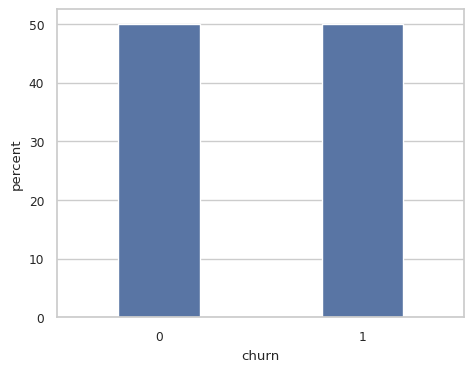

In [21]:
uniqueValues = trainSet["churn"].unique().tolist()
uniqueValues.sort()
sns.countplot(data = trainSet, x = "churn", order = uniqueValues, stat = "percent", width = 0.4)
plt.show()

##### Extract the input data from the balanced train set.

In [22]:
xTrain = trainSet.drop(columns = ["churn"])
xTrain.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
6239,613,France,Male,47,6,146034.7400,1,1,1,77146.1400
8451,575,Spain,Female,22,8,105229.3400,1,1,1,34397.0800
4236,492,France,Male,35,4,141359.3700,2,1,0,39519.5300
7177,559,Germany,Female,28,3,152264.8100,1,0,0,64242.3100
3327,802,Spain,Male,40,5,0.0000,2,1,1,175043.6900


Extract the target data from the balanced train set.

In [23]:
yTrain = trainSet[["churn"]]
yTrain.head()

,churn
6239,0
8451,0
4236,0
7177,0
3327,0


##### Note: The balanced train set will simply be referred to as the train set from this point onwards in the notebook.

##### Create a correlation heatmap using the variables in the train set.

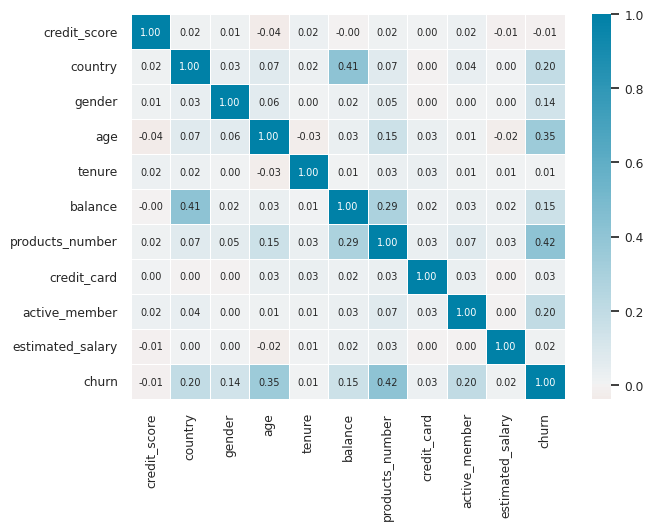

In [24]:
plt.figure(figsize = (7, 5))
sns.set(font_scale = 0.8)
correlationMatrix = associations(trainSet, nominal_columns = ["country", "gender", "products_number", "credit_card", "active_member"],
                                 compute_only = True)["corr"]
cmap = sns.diverging_palette(20, 230, s = 100, as_cmap = True)
sns.heatmap(correlationMatrix, cmap = cmap, center = 0, annot = True, annot_kws = {"fontsize": 7}, fmt = ".2f", linewidths = 0.5)
plt.show()

##### Build a one-hot encoding in the train and test sets of each of the categorical features that are either not binary or are coded as strings.

In [25]:
xTrain = pd.get_dummies(xTrain, columns = ["country", "gender", "products_number"], drop_first = True)
xTrain.head()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,products_number_2,products_number_3,products_number_4
6239,613,47,6,146034.7400,1,1,77146.1400,0,0,1,0,0,0
8451,575,22,8,105229.3400,1,1,34397.0800,0,1,0,0,0,0
4236,492,35,4,141359.3700,1,0,39519.5300,0,0,1,1,0,0
7177,559,28,3,152264.8100,0,0,64242.3100,1,0,0,0,0,0
3327,802,40,5,0.0000,1,1,175043.6900,0,1,1,1,0,0


In [26]:
xTest = pd.get_dummies(xTest, columns = ["country", "gender", "products_number"], drop_first = True)
xTest.head()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,products_number_2,products_number_3,products_number_4
9953,550,47,2,0.0000,1,1,97057.2800,0,0,1,1,0,0
3850,680,34,3,143292.9500,1,0,66526.0100,0,0,1,0,0,0
4962,531,42,2,0.0000,0,1,90537.4700,0,0,0,1,0,0
3886,710,34,8,147833.3000,0,1,1561.5800,1,0,1,1,0,0
5437,543,30,6,73481.0500,1,1,176692.6500,1,0,1,0,0,0


$\hspace{1in}$

##### **Absolute value of standardized coefficients**

##### Generalized Linear Models (GLMs), such as logisitic regression models, provide coefficients after they are fitted to data. Specifically, when a GLM is fiited to data after the continuous features are standardized, the absolute value of the standardized coefficients can be used as measures of feature importance.

##### Standardize the continuous features in the train and test sets.

In [27]:
continuousFeatures = ["credit_score", "age", "tenure", "balance", "estimated_salary"]
scaler = sklearn.preprocessing.StandardScaler()

xStandardizedTrain = xTrain.copy()
scaler.fit(xStandardizedTrain[continuousFeatures])
xStandardizedTrain[continuousFeatures] = scaler.transform(xStandardizedTrain[continuousFeatures])
xStandardizedTrain.head()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,products_number_2,products_number_3,products_number_4
6239,-0.3410,0.5738,0.3354,1.0416,1,1,-0.3897,0,0,1,0,0,0
8451,-0.7270,-1.8113,1.0152,0.3726,1,1,-1.1279,0,1,0,0,0,0
4236,-1.5700,-0.5710,-0.3443,0.9650,1,0,-1.0394,0,0,1,1,0,0
7177,-0.8895,-1.2388,-0.6842,1.1438,0,0,-0.6125,1,0,0,0,0,0
3327,1.5788,-0.0940,-0.0045,-1.3527,1,1,1.3007,0,1,1,1,0,0


In [28]:
xStandardizedTest = xTest.copy()
xStandardizedTest[continuousFeatures] = scaler.transform(xStandardizedTest[continuousFeatures])
xStandardizedTest.head()

,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,products_number_2,products_number_3,products_number_4
9953,-0.9809,0.5738,-1.0241,-1.3527,1,1,-0.0459,0,0,1,1,0,0
3850,0.3396,-0.6664,-0.6842,0.9967,1,0,-0.5731,0,0,1,0,0,0
4962,-1.1739,0.0968,-1.0241,-1.3527,0,1,-0.1585,0,0,0,1,0,0
3886,0.6443,-0.6664,1.0152,1.0711,0,1,-1.6948,1,0,1,1,0,0
5437,-1.0520,-1.0480,0.3354,-0.1479,1,1,1.3292,1,0,1,0,0,0


##### Train a logistic regression model.

In [29]:
lr = sklearn.linear_model.LogisticRegression()
lr.fit(xStandardizedTrain, yTrain.to_numpy().ravel())

LogisticRegression()

##### Plot feature importance.

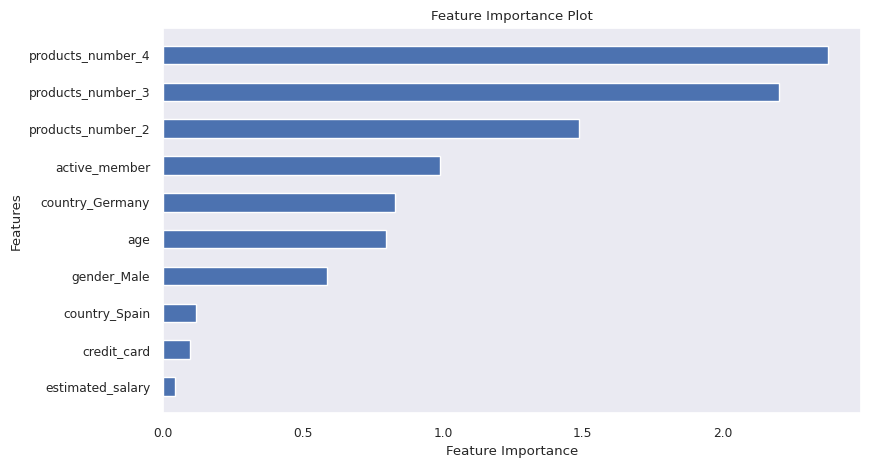

In [30]:
lrFeatureImportances = pd.DataFrame({'Feature': xStandardizedTrain.columns, 'Value' : abs(lr.coef_[0])})
lrFeatureImportances = lrFeatureImportances.sort_values(by = 'Value', ascending = False).head(10).sort_values(by = 'Value')

plt.figure(figsize = (9, 5))
plt.rcParams['axes.axisbelow'] = True
plt.barh(lrFeatureImportances.Feature, lrFeatureImportances.Value, height = 0.5)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.grid()
plt.show()

$\hspace{1in}$

##### **Mean decrease in Gini impurity**

##### Tree-based models, such as decision tree classifiers, calculate what is called *Gini impurity* that is used in building the trees. The mean decrease in Gini impurity when a feature is used in splitting the data can be used as a measure of importance of the feature.

##### Train a decision tree classifier.

In [31]:
dtc = sklearn.tree.DecisionTreeClassifier()
dtc.fit(xTrain, yTrain)

DecisionTreeClassifier()

##### Plot feature importance.

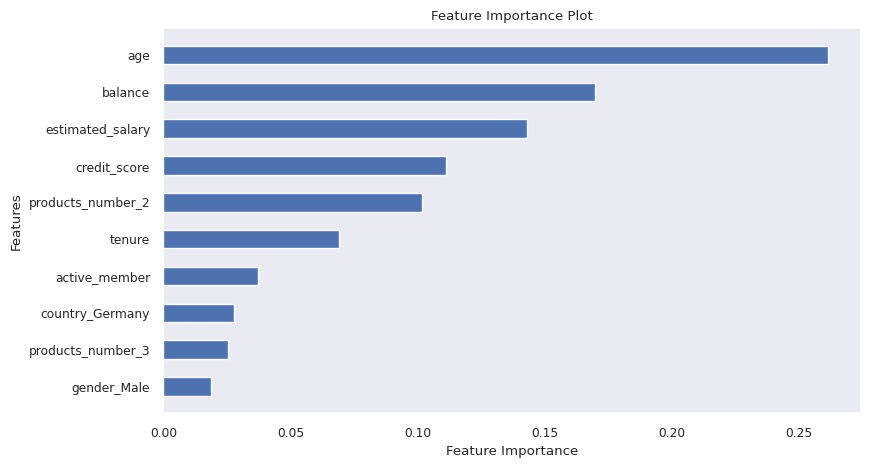

In [32]:
dtcFeatureImportances = pd.DataFrame({'Feature': xTrain.columns, 'Value' : abs(dtc.feature_importances_)})
dtcFeatureImportances = dtcFeatureImportances.sort_values(by = 'Value', ascending = False).head(10).sort_values(by = 'Value')

plt.figure(figsize = (9, 5))
plt.rcParams['axes.axisbelow'] = True
plt.barh(dtcFeatureImportances.Feature, dtcFeatureImportances.Value, height = 0.5)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.grid()
plt.show()

$\hspace{1in}$

##### **Permutation Importance**

##### The [permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html#) of a feature is the decrease in a specified model score when the values in the train or test set of the feature are randomly shuffled.

##### Plot permutation importance on the test set.

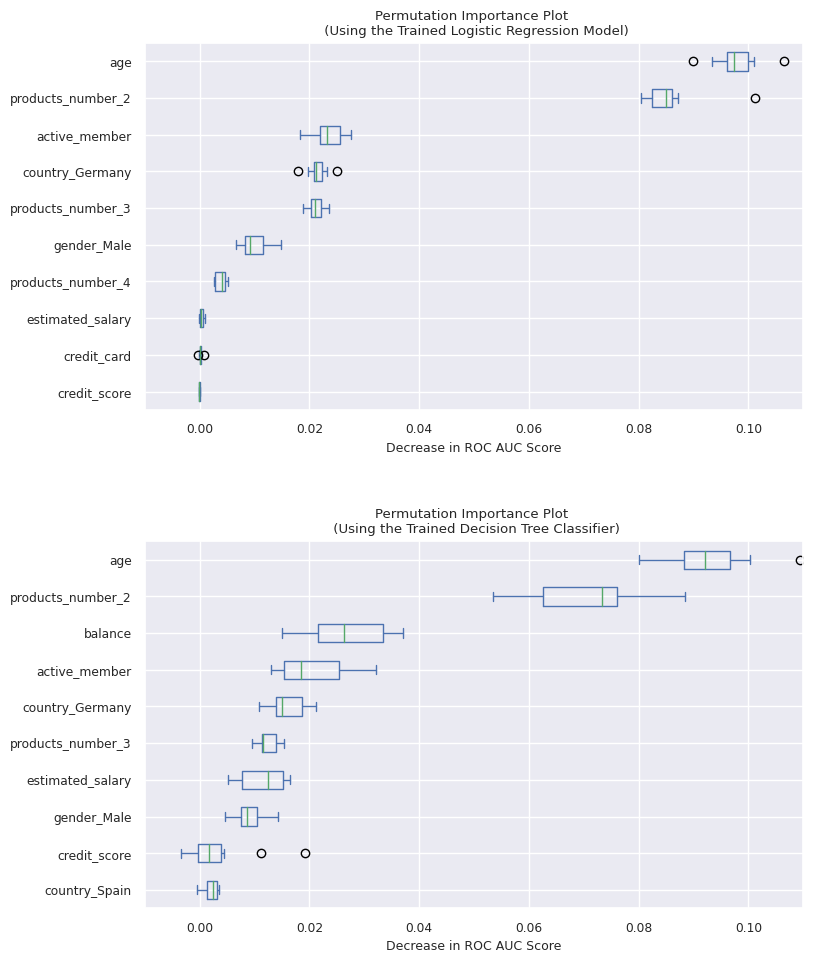

In [33]:
lrResult = permutation_importance(lr, xStandardizedTest, yTest, n_repeats = 10, random_state = 1, scoring = "roc_auc")
sortedIdx = lrResult.importances_mean.argsort()
lrImportances = pd.DataFrame(lrResult.importances[sortedIdx].T, columns = xStandardizedTest.columns[sortedIdx])
columns = list(lrImportances.columns)
lrTopImportances = lrImportances[columns[(len(columns) - 10):]]

dtcResult = permutation_importance(dtc, xTest, yTest, n_repeats = 10, random_state = 1, scoring = "roc_auc")
sortedIdx = dtcResult.importances_mean.argsort()
dtcImportances = pd.DataFrame(dtcResult.importances[sortedIdx].T, columns = xTest.columns[sortedIdx])
columns = list(dtcImportances.columns)
dtcTopImportances = dtcImportances[columns[(len(columns) - 10):]]

plt.rcParams["figure.figsize"] = [9, 10.5]
fig, axes = plt.subplots(2)

lrTopImportances.plot.box(vert = False, ax = axes[0])
axes[0].set_title("Permutation Importance Plot \n (Using the Trained Logistic Regression Model)")
axes[0].set_xlabel("Decrease in ROC AUC Score")
axes[0].xaxis.label.set_size(9)
axes[0].set_xlim(-0.01, 0.11)

dtcTopImportances.plot.box(vert = False, ax = axes[1])
axes[1].set_title("Permutation Importance Plot \n (Using the Trained Decision Tree Classifier)")
axes[1].set_xlabel("Decrease in ROC AUC Score")
axes[1].xaxis.label.set_size(9)
axes[1].set_xlim(-0.01, 0.11)

fig.tight_layout(pad = 4)

$\hspace{1in}$

##### **SHAP Values**

The [SHAP value](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html) of a feature for a given model prediction is the difference between the expected model prediction and the prediction obtained by marginalizing all the other features of the model. The mean of the absolute value of the SHAP values of a feature over all instances of interest can be used as measures of feature importance.

##### Display the SHAP bar plot, where the instances of interest belong to the test set.

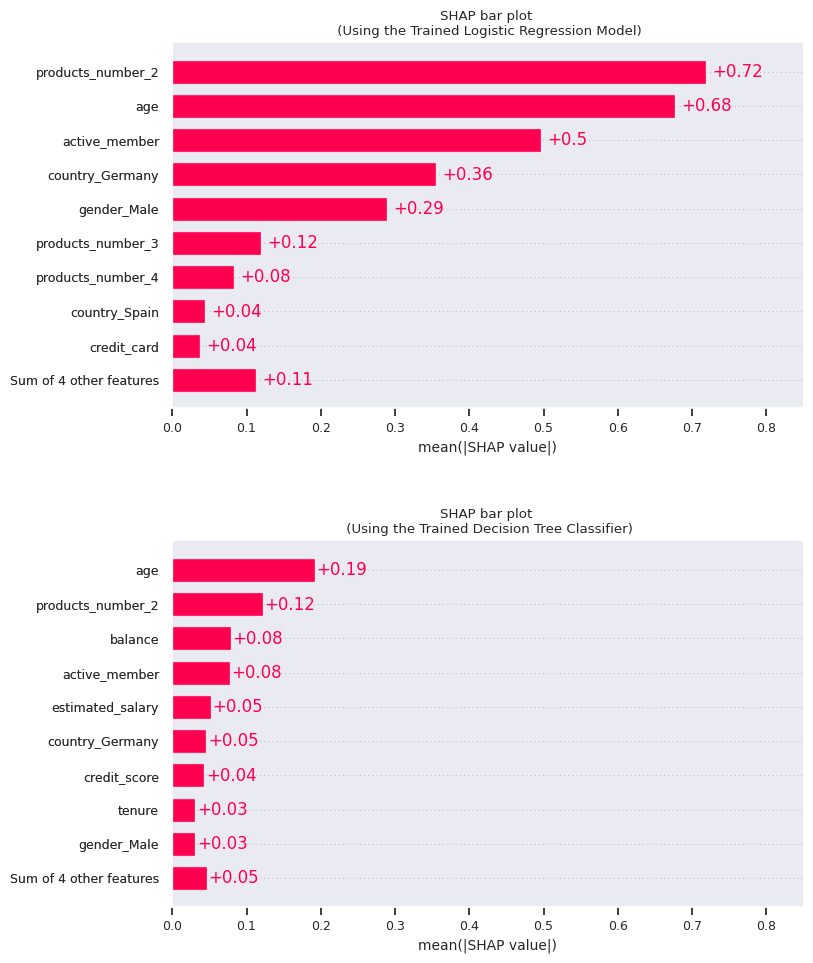

In [34]:
lrExplainer = shap.Explainer(lr, xStandardizedTrain)
lrShapValues = lrExplainer(xStandardizedTest)

dtcExplainer = shap.Explainer(dtc, xTrain)
dtcShapValues = dtcExplainer(xTest)

plt.subplot(2, 1, 1)
shap.plots.bar(lrShapValues, show = False)
ax1 = plt.gca()
ax1.set_title("SHAP bar plot \n (Using the Trained Logistic Regression Model)")
ax1.set_xlim(right = 0.85)
ax1.xaxis.set_tick_params(labelsize = 9)
ax1.yaxis.set_tick_params(labelsize = 9)
ax1.xaxis.label.set_size(10)
ax1.grid(False)

plt.subplot(2, 1, 2)
shap.plots.bar(dtcShapValues[:,:,1], show = False)
ax2 = plt.gca()
ax2.set_title("SHAP bar plot \n (Using the Trained Decision Tree Classifier)")
ax2.set_xlim(right = 0.85)
ax2.xaxis.set_tick_params(labelsize = 9)
ax2.yaxis.set_tick_params(labelsize = 9)
ax2.xaxis.label.set_size(10)
ax2.grid(False)

fig = plt.gcf()
fig.set_size_inches(9, 10.5)
fig.tight_layout(pad = 4)

plt.show()